In [1]:
# let us first import the libraries
# local import for convinience
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm

def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_placed_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_placed_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand_placed"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 3, Replenish: RQ <br>

- S1 -> DC1 -> demand1 <br>
- (inf) -> RQ=(500,500) -> 120/2days <br>
- lead time = 2 for all links
- time period = 59 days <br>

Performance Metrics:
Total Available Inventory: 400
Average Available Inventory: 644.0677966101695
Total Inventory Carry Cost: 7600.0
Total Inventory Spend: 600000
Total Transport Cost: 370
Total Revenue: 750000
Total Cost: 607960.0
Total Profit: 142040.0
Total Demand Placed by Customers: [30, 3600]
Total Fulfillment Received by Customers: [29, 3480]
Total Demand Placed by Site: [7, 3500]
Total Fulfillment Received by Site: [6, 3000]
Total Demand Placed: [37, 7100]
Total Fulfillment Received: [35, 6480]
Average Cost per Order: 16431.35135135135
Average Cost per Item: 85.6281690140845


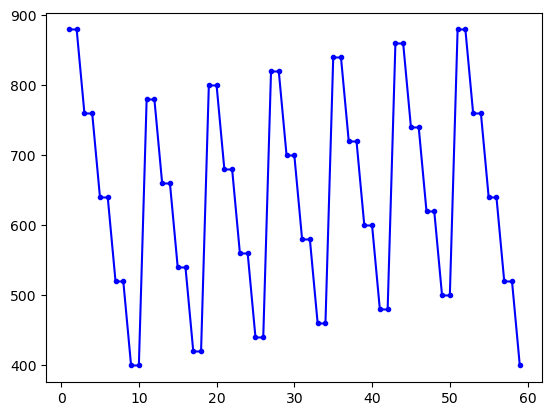

In [2]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=5000, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.RQReplenishment, policy_param={'R':500,'Q':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 2)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
scm.global_logger.disable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 4, Replenish: RQ <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> RQ=(500,500) -> 120/2days, 80/2days <br>
- lead time = 2 for all links
- time period = 59 days <br>

Performance Metrics:
Total Available Inventory: 500
Average Available Inventory: 601.6949152542373
Total Inventory Carry Cost: 7100.0
Total Inventory Spend: 1100000
Total Transport Cost: 720
Total Revenue: 1375000
Total Cost: 1107810.0
Total Profit: 267190.0
Total Demand Placed by Customers: [60, 6000]
Total Fulfillment Received by Customers: [58, 5800]
Total Demand Placed by Site: [12, 6000]
Total Fulfillment Received by Site: [11, 5500]
Total Demand Placed: [72, 12000]
Total Fulfillment Received: [69, 11300]
Average Cost per Order: 15386.25
Average Cost per Item: 92.3175


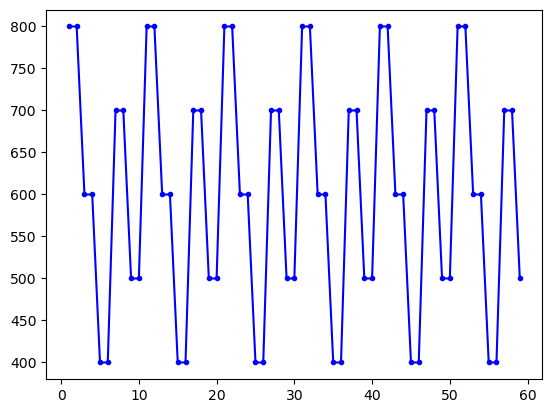

In [3]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=5000, initial_level=1000, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.RQReplenishment, policy_param={'R':500,'Q':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 2)
demand1 = scm.Demand(env=env, ID='demand_1', name='Dem 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
scm.global_logger.disable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand1,demand2])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
print_performance_metrics(supplynet)

### AnyLogistix 'Exercise 1'

__SC Network Desc:__

Total Nodes = 3, Replenish: SS <br>

- S1 -> DC1 -> demand1, demand2 <br>
- (inf) -> sS=(200,500) -> 120/2days, 80/2days <br>
- lead time = 2 for all links
- time period = 59 days <br>

INFO sim_trace - 0.0000:demand_2:Customer0:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 0.9999:D1: Inventory levels:380
INFO sim_trace - 1.0000:demand_2:Customer0:Demand at Distributor 1, Order quantity:120 received. Current inv: 380
INFO sim_trace - 1.9999:D1: Inventory levels:380
INFO sim_trace - 2.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 2.9999:D1: Inventory levels:260
INFO sim_trace - 3.0000:demand_2:Customer1:Demand at Distributor 1, Order quantity:120 received. Current inv: 260
INFO sim_trace - 3.9999:D1: Inventory levels:260
INFO sim_trace - 4.0000:demand_2:Customer2:Demand at Distributor 1, Order quantity:120, available.
INFO sim_trace - 4.9999:D1: Inventory levels:140
INFO sim_trace - 4.9999:D1:Replenishing inventory from supplier:Supplier 1, order placed for 360 units.
INFO sim_trace - 4.9999:D1:shipment in transit from supplier:Supplier 1.
INFO sim_trace - 5.0000:demand_2:Customer2:Demand at 

Performance Metrics:
Total Available Inventory: 140
Average Available Inventory: 262.03389830508473
Total Inventory Carry Cost: 3740.0
Total Inventory Spend: 648000
Total Transport Cost: 400
Total Revenue: 900000
Total Cost: 652140.0
Total Profit: 247860.0
Total Demand Placed by Customers: [30, 3600]
Total Fulfillment Received by Customers: [29, 3480]
Total Demand Placed by Site: [10, 3600]
Total Fulfillment Received by Site: [9, 3240]
Total Demand Placed: [40, 7200]
Total Fulfillment Received: [38, 6720]
Average Cost per Order: 16303.5
Average Cost per Item: 90.575


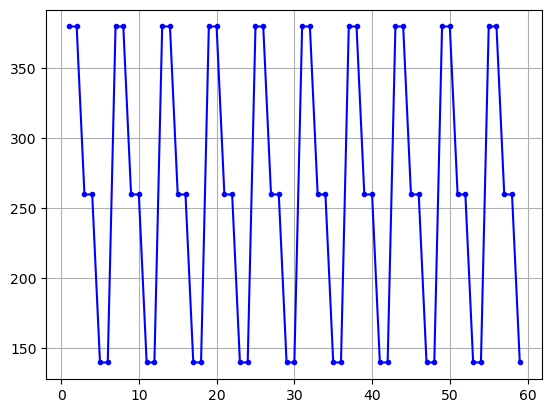

In [5]:
import simpy
env = simpy.Environment()
supplier = scm.Supplier(env=env, ID='S1', name='Supplier 1', node_type='infinite_supplier')
distributor = scm.InventoryNode(env=env, ID='D1', name='Distributor 1', node_type='distributor', capacity=500, initial_level=500, 
                                inventory_holding_cost=0.2, replenishment_policy=scm.SSReplenishment, policy_param={'s':200,'S':500}, 
                                product_sell_price=250, product_buy_price=200)
link1  = scm.Link(env=env, ID='L1', source=supplier, sink=distributor, cost=10, lead_time=lambda: 1)
#demand1 = scm.Demand(env=env, ID='demand_1', name='Dem 1', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
#                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 2)
demand2 = scm.Demand(env=env, ID='demand_2', name='Dem 2', order_arrival_model=lambda: 2, order_quantity_model=lambda:120, 
                     demand_node=distributor, delivery_cost=lambda: 10, lead_time=lambda: 1)
scm.global_logger.enable_logging()
env.run(until=59)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(nodes=[supplier,distributor],links=[link1],demands=[demand2])#,demand1])
supplynet = scm.simulate_sc_net(supplynet, sim_time=60)
inv_levels = np.array(distributor.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print_performance_metrics(supplynet)

In [3]:
distributor.orders_placed

[(4.9999, 'D1', 360, 1),
 (10.9999, 'D1', 360, 1),
 (16.9999, 'D1', 360, 1),
 (22.9999, 'D1', 360, 1),
 (28.9999, 'D1', 360, 1),
 (34.9999, 'D1', 360, 1),
 (40.9999, 'D1', 360, 1),
 (46.9999, 'D1', 360, 1),
 (52.9999, 'D1', 360, 1),
 (58.9999, 'D1', 360, 0)]